In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

In [2]:
ethusdt = pd.read_csv("data/ethusdt.csv", index_col="datetime")
ethusdt.head(10)

,Close
datetime,
2020-01-01 00:00:00,128.91
2020-01-01 00:15:00,128.78
2020-01-01 00:30:00,128.86
2020-01-01 00:45:00,128.87
2020-01-01 01:00:00,129.13
2020-01-01 01:15:00,130.26
2020-01-01 01:30:00,130.33
2020-01-01 01:45:00,130.64
2020-01-01 02:00:00,130.48


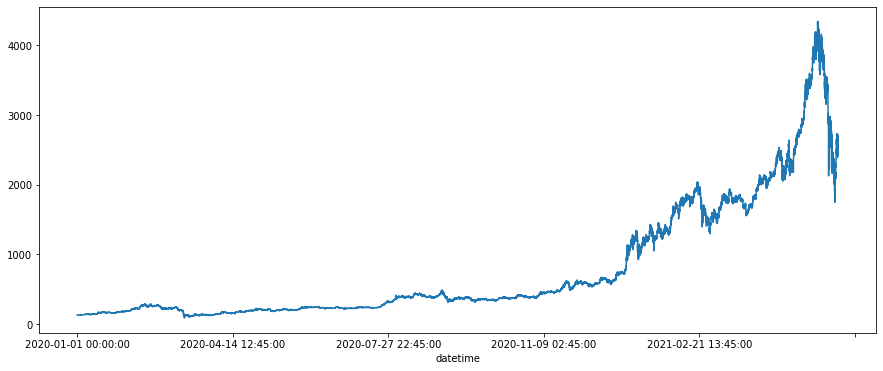

In [3]:
plt.figure(figsize=(15, 6))
ethusdt["Close"].plot()
plt.show();

In [4]:
def feature_engineering(price, period, window):
    
    X = price.copy()
    mavg = X.rolling(period).mean()
    diff = X - mavg
    for i in range(window):
        X[str(i)] = diff.shift(i)  
    return X.dropna()

In [5]:
df = feature_engineering(ethusdt, 15, 10)

In [6]:
df.head()

,Close,0,1,2,3,4,5,6,7,8,9
datetime,,,,,,,,,,,
2020-01-01 05:45:00,130.30,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,0.112667,-0.042000,0.076667,0.152667,0.158667
2020-01-01 06:00:00,130.48,0.128000,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,0.112667,-0.042000,0.076667,0.152667
2020-01-01 06:15:00,130.75,0.398000,0.128000,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,0.112667,-0.042000,0.076667
2020-01-01 06:30:00,130.62,0.283333,0.398000,0.128000,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,0.112667,-0.042000
2020-01-01 06:45:00,130.44,0.087333,0.283333,0.398000,0.128000,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,0.112667


In [42]:
def labels(data, minimum, maximum):
    
    labels = []    
    for i in range(data.shape[0] - maximum):
        rand = random.randint(minimum, maximum)
        if data["Close"][i] <= (data["Close"][i + rand]):
            labels.append(0.0)
        else:
            data["Close"][i] >= data["Close"][i + rand]
            labels.append(1.0)
    data = data.iloc[:len(labels)].copy()
    data["y"] = labels
    data = data.dropna()
    return data

In [43]:
dataset = labels(df, 5, 8)

In [44]:
dataset.head(20)

,Close,0,1,2,3,4,5,6,7,8,9,y
datetime,,,,,,,,,,,,
2020-01-01 05:45:00,130.30,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,0.112667,-0.042000,0.076667,0.152667,0.158667,1.0
2020-01-01 06:00:00,130.48,0.128000,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,0.112667,-0.042000,0.076667,0.152667,1.0
2020-01-01 06:15:00,130.75,0.398000,0.128000,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,0.112667,-0.042000,0.076667,1.0
2020-01-01 06:30:00,130.62,0.283333,0.398000,0.128000,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,0.112667,-0.042000,1.0
2020-01-01 06:45:00,130.44,0.087333,0.283333,0.398000,0.128000,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,0.112667,1.0
2020-01-01 07:00:00,130.48,0.127333,0.087333,0.283333,0.398000,0.128000,-0.070667,-0.072667,-0.074667,-0.204667,-0.208667,1.0
2020-01-01 07:15:00,130.58,0.196667,0.127333,0.087333,0.283333,0.398000,0.128000,-0.070667,-0.072667,-0.074667,-0.204667,1.0
2020-01-01 07:30:00,130.17,-0.211333,0.196667,0.127333,0.087333,0.283333,0.398000,0.128000,-0.070667,-0.072667,-0.074667,0.0
2020-01-01 07:45:00,130.24,-0.142667,-0.211333,0.196667,0.127333,0.087333,0.283333,0.398000,0.128000,-0.070667,-0.072667,0.0


In [46]:
dataset.y.value_counts(normalize=True)

0.0    0.5242
1.0    0.4758
Name: y, dtype: float64

In [50]:
def tester(data, spread=0.1):
    
    last_deal = int(2)
    last_price = 0.0
    report = [0.0]
    for i in range(data.shape[0]):
        pred = data["y"][i]
        if last_deal == 2:
            last_price = data["Close"][i]
            last_deal = 0 if pred <=0.5 else 1
            continue
        if last_deal == 0 and pred > 0.5:
            last_deal = 1
            report.append(report[-1] - spread + (data["Close"][i] - last_price))
            last_price = dataset["Close"][i]
            continue
        if last_deal == 1 and pred <= 0.5:
            last_deal = 0
            report.append(report[-1] - spread + (last_price - data["Close"][i]))
            last_price = data["Close"][i]
    return report

In [51]:
rep = tester(dataset, spread=1)

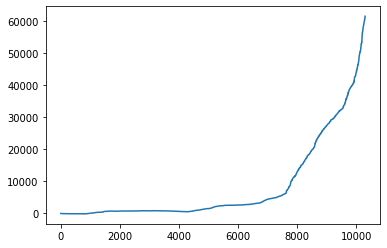

In [52]:
plt.plot(rep)
plt.show();

In [64]:
X = dataset.drop("y", axis=1)
y = dataset.y

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle=True,
                                                    random_state = 123)

lgbm_clf = LGBMClassifier(n_estimators=1000)
lgbm_clf.fit(X_train,
             y_train,
             eval_set=(X_test, y_test),
             early_stopping_rounds=250)

[1]	valid_0's binary_logloss: 0.691757
Training until validation scores don't improve for 250 rounds
[2]	valid_0's binary_logloss: 0.691073
[3]	valid_0's binary_logloss: 0.690619
[4]	valid_0's binary_logloss: 0.690105
[5]	valid_0's binary_logloss: 0.689591
[6]	valid_0's binary_logloss: 0.689111
[7]	valid_0's binary_logloss: 0.688977
[8]	valid_0's binary_logloss: 0.688564
[9]	valid_0's binary_logloss: 0.688549
[10]	valid_0's binary_logloss: 0.688425
[11]	valid_0's binary_logloss: 0.68828
[12]	valid_0's binary_logloss: 0.688144
[13]	valid_0's binary_logloss: 0.687911
[14]	valid_0's binary_logloss: 0.687716
[15]	valid_0's binary_logloss: 0.687417
[16]	valid_0's binary_logloss: 0.687369
[17]	valid_0's binary_logloss: 0.687245
[18]	valid_0's binary_logloss: 0.686977
[19]	valid_0's binary_logloss: 0.686924
[20]	valid_0's binary_logloss: 0.686775
[21]	valid_0's binary_logloss: 0.686791
[22]	valid_0's binary_logloss: 0.686706
[23]	valid_0's binary_logloss: 0.686684
[24]	valid_0's binary_loglos

[261]	valid_0's binary_logloss: 0.685412
[262]	valid_0's binary_logloss: 0.685448
[263]	valid_0's binary_logloss: 0.685403
[264]	valid_0's binary_logloss: 0.685408
[265]	valid_0's binary_logloss: 0.685505
[266]	valid_0's binary_logloss: 0.685551
[267]	valid_0's binary_logloss: 0.685555
[268]	valid_0's binary_logloss: 0.685593
[269]	valid_0's binary_logloss: 0.685609
[270]	valid_0's binary_logloss: 0.685621
[271]	valid_0's binary_logloss: 0.685713
[272]	valid_0's binary_logloss: 0.685879
[273]	valid_0's binary_logloss: 0.685891
[274]	valid_0's binary_logloss: 0.686058
[275]	valid_0's binary_logloss: 0.686052
[276]	valid_0's binary_logloss: 0.686134
[277]	valid_0's binary_logloss: 0.686133
[278]	valid_0's binary_logloss: 0.686251
[279]	valid_0's binary_logloss: 0.686314
[280]	valid_0's binary_logloss: 0.686276
[281]	valid_0's binary_logloss: 0.686302
[282]	valid_0's binary_logloss: 0.686319
[283]	valid_0's binary_logloss: 0.68637
[284]	valid_0's binary_logloss: 0.686271
[285]	valid_0's b

LGBMClassifier(n_estimators=1000)

In [65]:
lgbm_clf.score(X_test, y_test)

0.5546467641345466

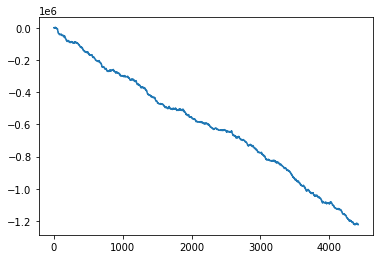

In [80]:
p = lgbm_clf.predict_proba(X_test)
proba = [x[0]<0.5 for x in p]
new_dataset = X_test.copy()
new_dataset["y"] = proba
report = tester(new_dataset, spread=1)
plt.plot(report)
plt.show();